In [ ]:
# importing relevent libreries 

import pandas as pd
import numpy as np
import pandas.api.types as ptypes
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle

In [44]:
#function to change the classes from M or B to 1 / 0 respectivly 
def into_num(classify):
    if (classify == 'B'):
        return(0)
    else:
        return(1)

In [3]:
#to get all the columns name in view
pd.set_option('display.max_columns', None)

#csv is loaded from the given location and the given names are added to the columns
csv_loc = '..\\'
csv_name= 'Exercise1 - data.csv'
col_names=["PID", "Class", "Radius_mean", "Texture_mean", "Perimeter_mean", "Area_mean","Smoothness_mean","Compactness_mean","Concavity_mean","Concave-points_mean","Symmatry_mean","Fractal-dimension_mean","Radius_SE", "Texture_SE", "Perimeter_SE", "Area_SE","Smoothness_SE","Compactness_SE","Concavity_SE","Concave-points_SE","Symmatry_SE","Fractal-dimension_SE","Radius_largest", "Texture_largest", "Perimeter_largest", "Area_largest","Smoothness_largest","Compactness_largest","Concavity_largest","Concave-points_largest","Symmatry_largest","Fractal-dimension_largest"]
df = pd.read_csv(csv_loc+csv_name, names=col_names)

#get the dimensions of dataframe
df.shape

(569, 32)

In [4]:
#just making sure data has no null values
pd.isnull(df).sum()

PID                          0
Class                        0
Radius_mean                  0
Texture_mean                 0
Perimeter_mean               0
Area_mean                    0
Smoothness_mean              0
Compactness_mean             0
Concavity_mean               0
Concave-points_mean          0
Symmatry_mean                0
Fractal-dimension_mean       0
Radius_SE                    0
Texture_SE                   0
Perimeter_SE                 0
Area_SE                      0
Smoothness_SE                0
Compactness_SE               0
Concavity_SE                 0
Concave-points_SE            0
Symmatry_SE                  0
Fractal-dimension_SE         0
Radius_largest               0
Texture_largest              0
Perimeter_largest            0
Area_largest                 0
Smoothness_largest           0
Compactness_largest          0
Concavity_largest            0
Concave-points_largest       0
Symmatry_largest             0
Fractal-dimension_largest    0
dtype: i

In [5]:
#seprate the inputs from the output X is input y is the ground truth values
X = df.drop(['Class','PID'],axis=1) 
y = df['Class'] 
X.head(3)

,Radius_mean,Texture_mean,Perimeter_mean,Area_mean,Smoothness_mean,Compactness_mean,Concavity_mean,Concave-points_mean,Symmatry_mean,Fractal-dimension_mean,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave-points_SE,Symmatry_SE,Fractal-dimension_SE,Radius_largest,Texture_largest,Perimeter_largest,Area_largest,Smoothness_largest,Compactness_largest,Concavity_largest,Concave-points_largest,Symmatry_largest,Fractal-dimension_largest
229,12.83,22.33,85.26,503.2,0.1088,0.1799,0.16950,0.06861,0.2123,0.07254,0.3061,1.0690,2.257,25.13,0.006983,0.03858,0.04683,0.01499,0.01680,0.005617,15.20,30.15,105.30,706.0,0.1777,0.5343,0.6282,0.19770,0.3407,0.12430
20,13.08,15.71,85.63,520.0,0.1075,0.1270,0.04568,0.03110,0.1967,0.06811,0.1852,0.7477,1.383,14.67,0.004097,0.01898,0.01698,0.00649,0.01678,0.002425,14.50,20.49,96.09,630.5,0.1312,0.2776,0.1890,0.07283,0.3184,0.08183
0,17.99,10.38,122.80,1001.0,0.1184,0.2776,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890


In [6]:
#to check the balance of the data

print('total: '+str(df.Class.count()))

mel = df[df.Class == 'M'].count()
print('mel: '+str(mel.Class))

ben = df[df.Class == 'B'].count()
print('ben: '+str(ben.Class))

total: 569
mel: 212
ben: 357


In [7]:
y =y.apply(into_num)
y.value_counts()

0    357
1    212
Name: Class, dtype: int64

In [39]:
#get seprate traing and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [40]:
#normalise the input values before the feed
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [56]:

#initilise the model
Model = Sequential()

#First hidden layer
Model.add(Dense(activation='relu',  input_dim=30, units=16,kernel_initializer="uniform"))
Model.add(Dropout(rate=0.2))


# second hidden layer
Model.add(Dense(units=16, kernel_initializer="uniform", activation='relu'))
Model.add(Dropout(rate=0.2))

#third hidden layer
Model.add(Dense(units=8, kernel_initializer="uniform", activation='relu'))
Model.add(Dropout(rate=0.2))

Model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

#compile the model
Model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [57]:
#train the model
Model.fit(X_train, y_train, batch_size=100, epochs=150)

Epoch 1/150
455/455 [==============================] - 1s 3ms/step - loss: 0.6929 - acc: 0.6264
Epoch 2/150
455/455 [==============================] - 0s 35us/step - loss: 0.6923 - acc: 0.6198
Epoch 3/150
455/455 [==============================] - 0s 33us/step - loss: 0.6915 - acc: 0.6198
Epoch 4/150
455/455 [==============================] - 0s 31us/step - loss: 0.6905 - acc: 0.6198
Epoch 5/150
455/455 [==============================] - 0s 35us/step - loss: 0.6892 - acc: 0.6220
Epoch 6/150
455/455 [==============================] - 0s 29us/step - loss: 0.6871 - acc: 0.6484
Epoch 7/150
455/455 [==============================] - 0s 31us/step - loss: 0.6840 - acc: 0.7429
Epoch 8/150
455/455 [==============================] - 0s 31us/step - loss: 0.6795 - acc: 0.8396
Epoch 9/150
455/455 [==============================] - 0s 37us/step - loss: 0.6722 - acc: 0.8791
Epoch 10/150
455/455 [==============================] - 0s 37us/step - loss: 0.6607 - acc: 0.9077
Epoch 11/150
455/455 [========

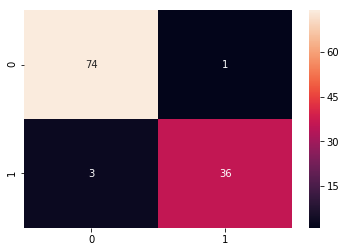

In [58]:
#run the test part through the traied model
y_pred = Model.predict(X_test)

#take scores that are more than 0.5
y_pred = (y_pred > 0.5)

#calculation of the confusion matrix
con_mat = confusion_matrix(y_test, y_pred)
#plot a seaborn heatmap 
sns.heatmap(con_mat,annot=True)
plt.savefig('confusion_matrix.png')

In [6]:
correct = 74+36
wrong = 3+1
total = correct + wrong
accuracy = (correct/total)*100
print("accuracy: "+ str(accuracy))

accuracy: 96.49122807017544
